<a href="https://colab.research.google.com/github/vivintsmartvideo/vivintsmartvideo.github.io/blob/master/peer2peer_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas-gbq -U


  Found existing installation: pandas-gbq 0.11.0
    Uninstalling pandas-gbq-0.11.0:
      Successfully uninstalled pandas-gbq-0.11.0


In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas_gbq

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
%matplotlib inline

In [ ]:
plt.rcParams["figure.figsize"] = (30,10)

# Peer to Peer Metrics

## MixPanel Data

In [ ]:
project_id = "video-analytics-193323"

sql = """
SELECT mp_event_name, mp_duration, mp_device_id, app, peer_to_peer_boolean, camera_type, panel_version, device_id, signaling, ice_candidate_pair, mp_carrier, mp_processing_time_ms, mp_app_version_string, firmware_version, mp_brand, service_number, mp_insert_id, connected_to
FROM `mixpanel-prod-1.mixpanel_nessie_day_partitioned_944021.mp_master_event`
WHERE peer_to_peer_boolean = TRUE AND mp_event_name = "Camera Play"
ORDER BY mp_duration DESC
LIMIT 10000
"""
df = pandas_gbq.read_gbq(sql, project_id=project_id)

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=725825577420-unm2gnkiprugilg743tkbig250f4sfsj.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fbigquery&state=3n55for0rWVnnhLGsUsNoYyql1vkO3&prompt=consent&access_type=offline
Enter the authorization code: 4/1QHaG5X8gFZ-1CsPmetOATMCSvJJsKvRYHRsMf63XAoFYbey4ZfLuyg


Downloading: 100%|██████████| 1205/1205 [00:00<00:00, 3170.87rows/s]


### Average Camera Load Times

In [ ]:
df.groupby('mp_app_version_string')['mp_duration'].mean()

mp_app_version_string
20.4.100           5.470500
20.4.300           5.383667
20.5.300           4.644833
20.5.301 (3)       5.298000
20.6.100           6.263500
20.6.100 (1)       5.520571
20.6.300           5.751622
20.6.300 (3)       5.306114
20.7.200 (327)     7.127000
20.7.200 (330)     7.802000
20.7.200 (331)     3.301250
20.7.200 (332)     3.906793
20.7.200 (333)     3.749333
20.7.200 (334)     3.479683
20.7.200 (335)    11.203040
20.7.200 (336)     3.732507
20.7.200 (4)       3.177739
20.7.200 (999)     6.125670
Name: mp_duration, dtype: float64

### Average Camera Load Times Table data

In [ ]:
df

,mp_event_name,mp_duration,mp_device_id,app,peer_to_peer_boolean,camera_type,panel_version,device_id,signaling,ice_candidate_pair,mp_carrier,mp_processing_time_ms,mp_app_version_string,firmware_version,mp_brand,service_number,mp_insert_id,connected_to
0,Camera Play,2493.222000,None,Android,True,Doorbell Camera Pro,3.20.1.30340,ANDROID_ID:e156ac3382e72dfd,firebase,srflx / srflx,T-Mobile,1.593028e+12,20.7.200 (335),1.0.20.350.rc,samsung,5360378.0,15795b9e5b484594,Home network
1,Camera Play,226.104000,None,Android,True,Doorbell Camera Pro,3.20.2.30727,ANDROID_ID:cfe3660c70633068,firebase,host / host,Verizon Wireless,1.593133e+12,20.7.200 (999),1.0.20.350.rc,Verizon,5756816.0,28631274f2985518,Home network
2,Camera Play,56.936001,2CDB82C6-9379-4A90-ACAE-2CD4D4409199,iOS,True,Doorbell Camera Pro,3.20.1.30338,0AB032D6-B5F7-45BD-85C4-FB760E463BA0,None,srflx / srflx,AT&T,1.592883e+12,20.6.300,1.0.20.350.rc,None,5360078.0,8acc1ec65d70efb7,Home network
3,Camera Play,48.202000,2CDB82C6-9379-4A90-ACAE-2CD4D4409199,iOS,True,Doorbell Camera Pro,3.20.1.30338,0AB032D6-B5F7-45BD-85C4-FB760E463BA0,None,srflx / srflx,AT&T,1.592883e+12,20.6.300,1.0.20.350.rc,None,5360078.0,004bfe5dc1f21b47,Home network
4,Camera Play,45.227001,B93E25DE-8A90-4C38-AFBD-44D56D2B6E71,iOS,True,Doorbell Camera Pro,3.20.1.30338,B93E25DE-8A90-4C38-AFBD-44D56D2B6E71,None,srflx / srflx,Verizon,1.592770e+12,20.6.300,1.0.20.350.rc,None,6582515.0,2d454ac11ee58723,Home network
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,Camera Play,NaN,0AA5A2FD-9432-4F91-A95C-03C9C898236A,iOS,True,Doorbell Camera Pro,3.20.2.30727,BD086CDA-A8AA-4B92-83B4-A64BB13D9B70,None,host / prflx,Sprint,1.592779e+12,20.6.300,1.0.20.350.rc,None,5433007.0,edb2c8da811a4812,Home network
1201,Camera Play,NaN,D39872D7-6BD9-430E-BED3-7FEDC054B229,iOS,True,Doorbell Camera Pro,3.20.2.30727,887B11EC-1649-4728-8DD2-ABDB42E497B7,None,host / prflx,Bell,1.592913e+12,20.6.300,1.0.20.350.rc,None,7310885.0,beefda83ffd08809,Smart Hub
1202,Camera Play,NaN,D7DF958A-1DF4-43D5-A219-863A1453E75F,iOS,True,Doorbell Camera Pro,3.20.1.30338,88279179-6FA1-4A44-A72C-5135DC8D6AD1,None,srflx / srflx,Verizon,1.592858e+12,20.6.300,1.0.20.350.rc,None,6772616.0,b1b54ea22e24a694,Home network
1203,Camera Play,NaN,CE10E715-4959-4A6E-9AC4-FBEAB996F67E,iOS,True,Doorbell Camera Pro,3.20.0.29905,BB0EA548-3906-4401-93EE-E549D1DE1D70,None,host / prflx,Verizon,1.592857e+12,20.6.300,1.0.20.350.rc,None,5352376.0,7f9ae1a930cfacc6,Smart Hub


### Average Camera Load Times Boxplots

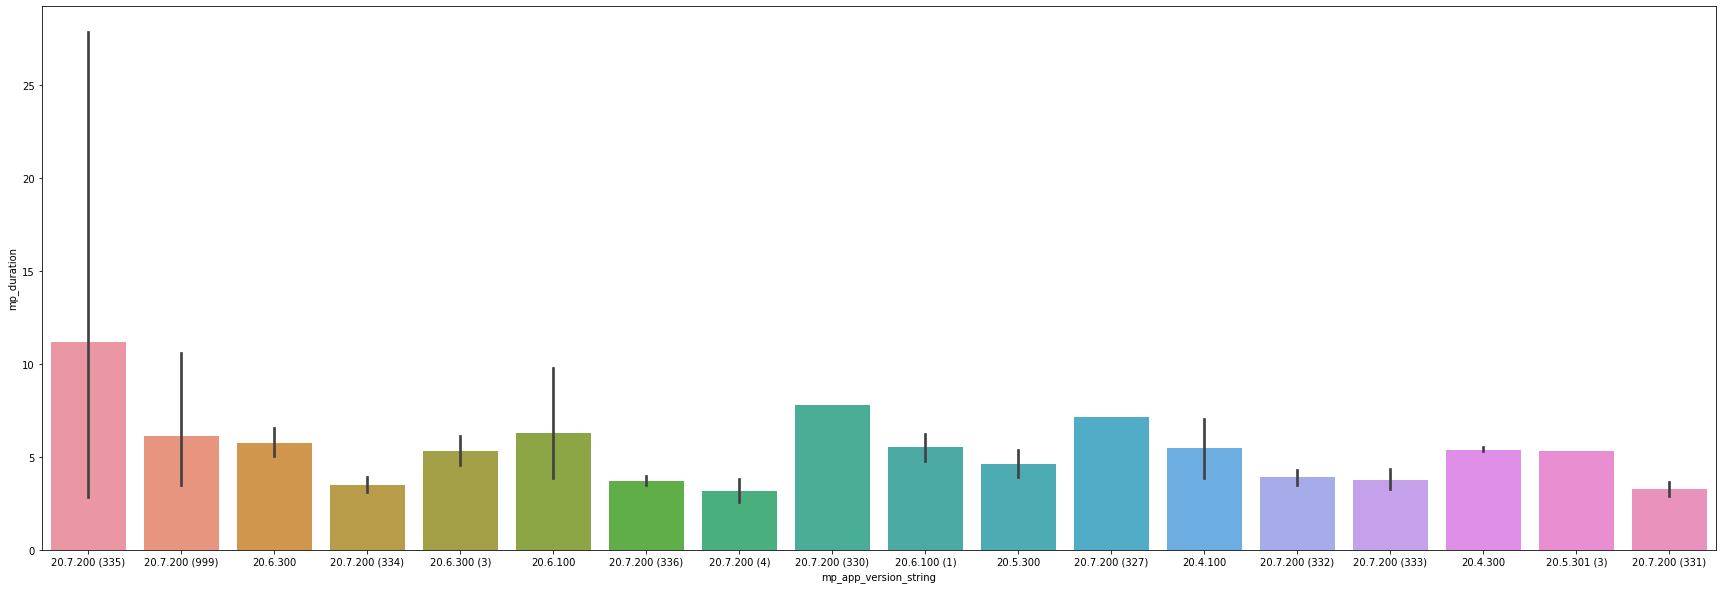

In [ ]:
sns.barplot(x='mp_app_version_string', y='mp_duration', data=df)

### Average Camera Load Times Violinplots

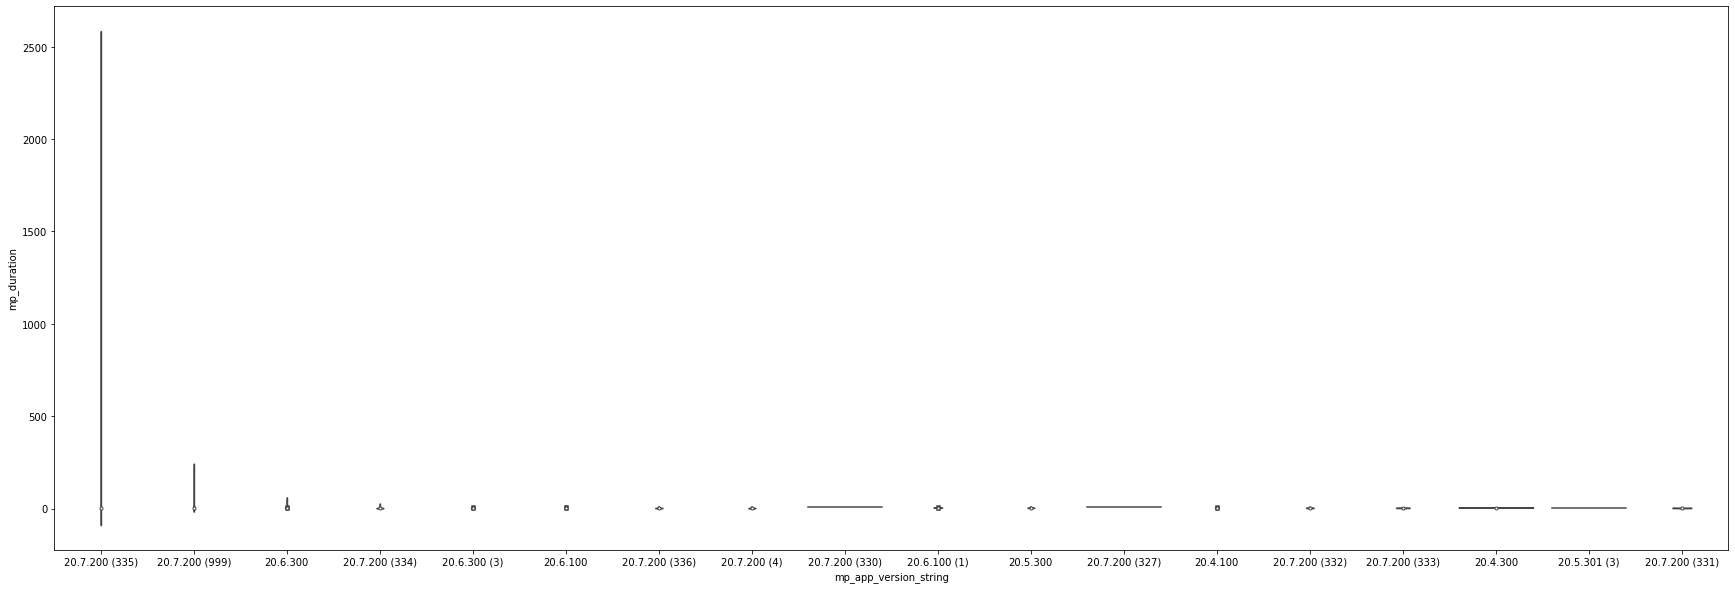

In [ ]:
ax = sns.violinplot(x="mp_app_version_string", y="mp_duration", data=df)

### Average Camera Load Times Boxplots (removed some versions)

/usr/local/lib/python3.6/dist-packages/pandas/core/computation/expressions.py:178: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "


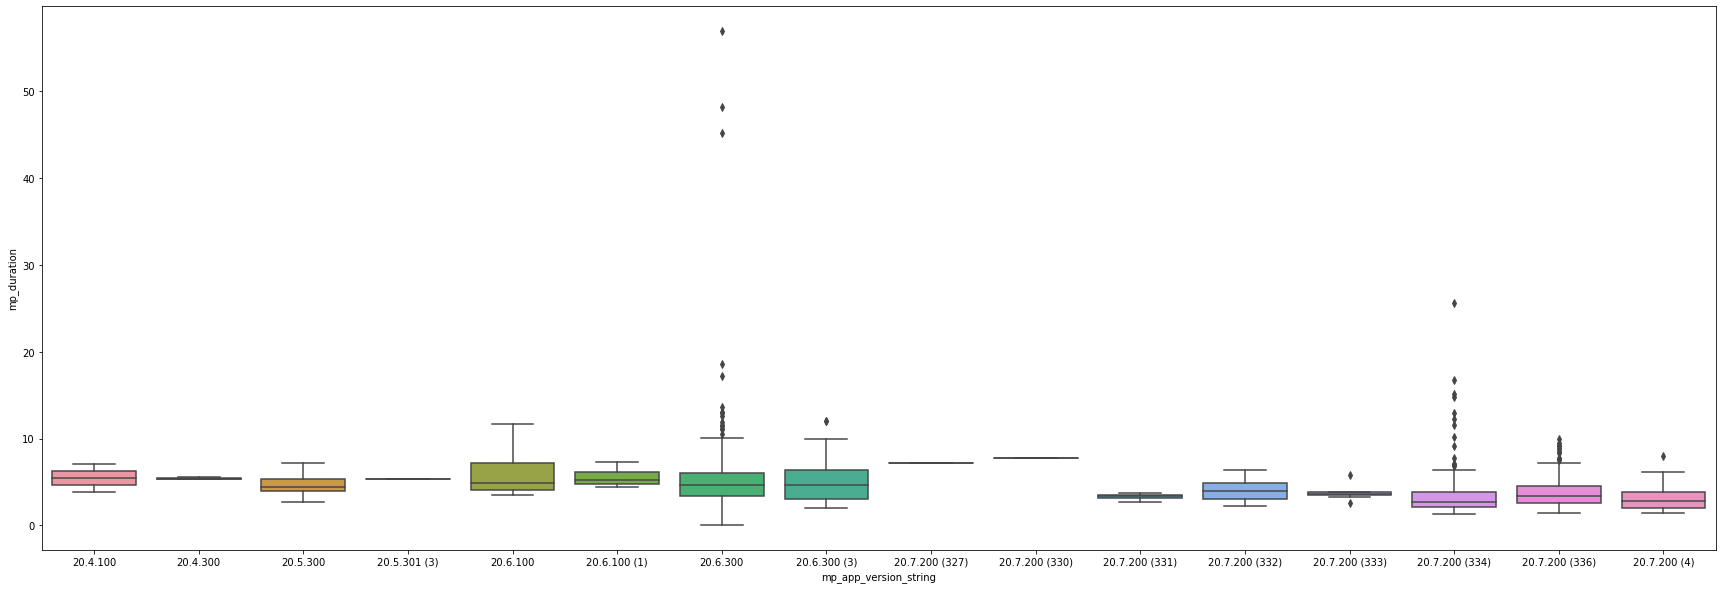

In [ ]:
rdf = df[(df['mp_app_version_string']!='20.7.200 (335)') * (df['mp_app_version_string']!='20.7.200 (999)')]
ax = sns.boxplot(x="mp_app_version_string",
                    y="mp_duration",
                    data=rdf,
                    order=np.sort(rdf.mp_app_version_string.unique()))

### Average Camera Load Times Violinplots (removed some versions)

/usr/local/lib/python3.6/dist-packages/pandas/core/computation/expressions.py:178: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "


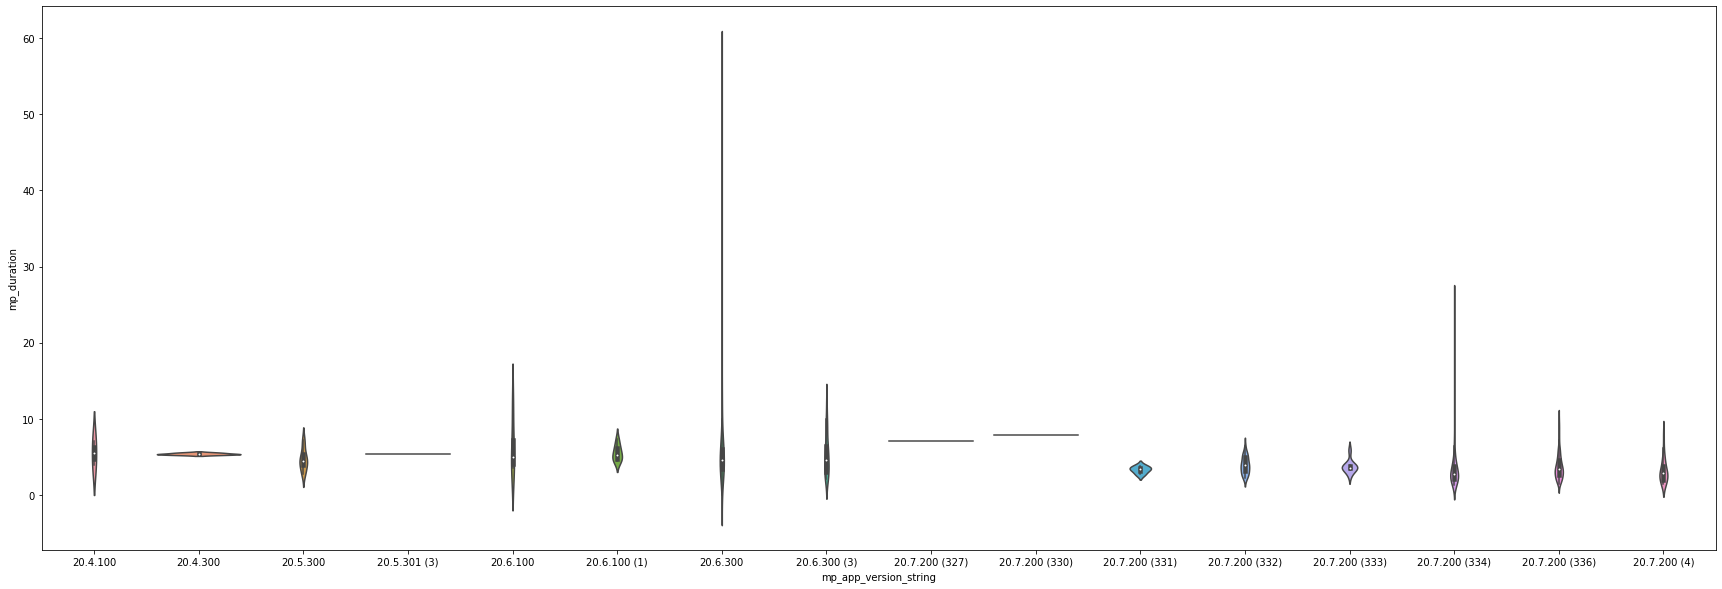

In [ ]:
rdf = df[(df['mp_app_version_string']!='20.7.200 (335)') * (df['mp_app_version_string']!='20.7.200 (999)')]
ax = sns.violinplot(x="mp_app_version_string",
                    y="mp_duration",
                    data=rdf,
                    order=np.sort(rdf.mp_app_version_string.unique()))

In [ ]:
sql = """
SELECT mp_event_name, mp_duration, mp_device_id, app, peer_to_peer_boolean, camera_type, panel_version, device_id, signaling, ice_candidate_pair, mp_carrier, mp_processing_time_ms, mp_app_version_string, firmware_version, mp_brand, service_number, mp_insert_id, connected_to
FROM `mixpanel-prod-1.mixpanel_nessie_day_partitioned_944021.mp_master_event`
WHERE peer_to_peer_boolean = TRUE
LIMIT 10000
"""

sr_df = pandas_gbq.read_gbq(sql, project_id=project_id)

Downloading: 100%|██████████| 3305/3305 [00:01<00:00, 3255.82rows/s]


### Connection Success Rate

In [ ]:
sr_appver_df = sr_df.groupby(['mp_app_version_string', 'mp_event_name'])['mp_event_name'].count().unstack(level=1)
sr_appver_df['Camera Play Success Rate'] = sr_appver_df.apply(lambda row: row['Camera Play'] / (row['Camera Play'] + row['Camera Play Aborted'] ), axis=1)
sr_appver_df

mp_event_name,Camera Play,Camera Play Aborted,Camera Two Way Talk,Camera View Duration,Signaling Server Connection,Camera Play Success Rate
mp_app_version_string,,,,,,
20.1.401,NaN,2.0,NaN,NaN,NaN,NaN
20.3.200,NaN,7.0,NaN,NaN,NaN,NaN
20.4.100,2.0,5.0,NaN,NaN,NaN,0.285714
20.4.300,3.0,12.0,NaN,NaN,NaN,0.200000
20.5.101,NaN,6.0,NaN,NaN,NaN,NaN
20.5.300,12.0,30.0,NaN,1.0,NaN,0.285714
20.5.301 (3),1.0,NaN,NaN,NaN,NaN,NaN
20.6.100,4.0,9.0,NaN,NaN,NaN,0.307692
20.6.100 (1),7.0,NaN,NaN,NaN,NaN,NaN


### Camera Load Success Rate - Table Raw Data

In [ ]:
sr_df

,mp_event_name,mp_duration,mp_device_id,app,peer_to_peer_boolean,camera_type,panel_version,device_id,signaling,ice_candidate_pair,mp_carrier,mp_processing_time_ms,mp_app_version_string,firmware_version,mp_brand,service_number,mp_insert_id,connected_to
0,Camera Play,5.862000,4B91416F-9D23-40AA-9F03-377824B80F0F,iOS,True,Doorbell Camera Pro,3.20.1.30338,C318C285-08A5-4A9F-A8B3-E27B54BD7139,None,srflx / srflx,Verizon,1.592776e+12,20.6.300,1.0.20.350.rc,None,3416522.0,19b4ab2d857e34b7,Home network
1,Camera Play,5.688000,4B91416F-9D23-40AA-9F03-377824B80F0F,iOS,True,Doorbell Camera Pro,3.20.1.30338,C318C285-08A5-4A9F-A8B3-E27B54BD7139,None,srflx / srflx,Verizon,1.592791e+12,20.6.300,1.0.20.350.rc,None,3416522.0,8f7c701aaebe2372,Home network
2,Camera Play Aborted,106.616997,4B91416F-9D23-40AA-9F03-377824B80F0F,iOS,True,Doorbell Camera Pro,3.20.1.30338,C318C285-08A5-4A9F-A8B3-E27B54BD7139,None,None,Verizon,1.592791e+12,20.6.300,1.0.20.350.rc,None,3416522.0,1fde9ea3b0016627,Home network
3,Camera Play Aborted,38.841999,4B91416F-9D23-40AA-9F03-377824B80F0F,iOS,True,Doorbell Camera Pro,3.20.1.30338,C318C285-08A5-4A9F-A8B3-E27B54BD7139,None,None,Verizon,1.592791e+12,20.6.300,1.0.20.350.rc,None,3416522.0,a512d396ea19d8f5,Home network
4,Camera Two Way Talk,8.741000,None,Android,True,Doorbell Camera Pro,3.20.2.30727,ANDROID_ID:026c61ad2675d6b3,None,None,AT&T,1.593016e+12,20.7.200 (335),1.0.20.350.rc,samsung,6314806.0,ac90291a7fba4e6e,Home network
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3300,Camera Play Aborted,25.879999,68A8FD88-496F-4FCB-AA94-0FBB9676E9D0,iOS,True,Doorbell Camera Pro,3.20.2.30727,68A8FD88-496F-4FCB-AA94-0FBB9676E9D0,None,None,TFW,1.593133e+12,20.6.300,1.0.20.350.rc,None,5774013.0,cfcec3fa1e1d0b76,Home network
3301,Camera Play Aborted,32.115002,68A8FD88-496F-4FCB-AA94-0FBB9676E9D0,iOS,True,Doorbell Camera Pro,3.20.2.30727,68A8FD88-496F-4FCB-AA94-0FBB9676E9D0,None,None,TFW,1.593135e+12,20.6.300,1.0.20.350.rc,None,5774013.0,92e25fff2a518caf,Home network
3302,Camera Play Aborted,27.648001,68A8FD88-496F-4FCB-AA94-0FBB9676E9D0,iOS,True,Doorbell Camera Pro,3.20.2.30727,68A8FD88-496F-4FCB-AA94-0FBB9676E9D0,None,None,TFW,1.593137e+12,20.6.300,1.0.20.350.rc,None,5774013.0,d8fd3b37fb32e2d4,Home network
3303,Camera Play Aborted,19.784000,D302BC24-DA36-4406-93AA-821106210D7B,iOS,True,Doorbell Camera Pro,3.20.1.30338,C273C026-9789-4C34-AE41-74E57AED1A9F,None,None,Verizon,1.593130e+12,20.6.300,1.0.20.350.rc,None,5497927.0,798a404f193ac1b3,Home network


## Google Trace Data